In [1]:
import json
from transformers import RobertaTokenizer, RobertaModel
import matplotlib.pyplot as plt
import torch
from sklearn.manifold import TSNE

In [2]:
model = RobertaModel.from_pretrained("./roberta-base/")
tokenizer = RobertaTokenizer("./roberta-base/vocab.json", "./roberta-base/merges.txt", use_fast=False)

In [8]:
with open('original_text/hc3_test.json') as f:
    line = f.readline()
    text = json.loads(line.strip())['text']
    print(text)
with open('perturbed_text/hc3_test_adj_30_synonym_replace.json') as f:
    line = f.readline()
    per_text = json.loads(line.strip())['text']
    print(per_text)

Do you use any other online features of Quicken?  How many unique ticker symbols do you have?  How often do you really need to update the prices?  You can always continue to use Quicken, and enter the stock prices by hand. Maybe update them once a month to get an idea of how your investments are doing. That should work indefinitely.
Do you use any other on-line features of Quicken ?   How many singular ticker symbols do you have ?   How often do you really need to update the prices ?   You can always continue to use Quicken , and enter the stock prices by hand . Maybe update them once a month to get an idea of how your investments are doing . That should work indefinitely .


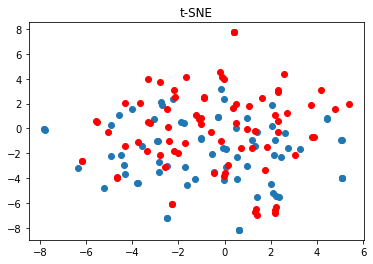

In [14]:
L = min(len(text), len(per_text))
inputs1 = tokenizer(text[:L], return_tensors='pt')
inputs2 = tokenizer(per_text[:L], return_tensors='pt')

# 获取词向量
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# 选择最后一层的隐藏状态
embeddings1 = outputs1.last_hidden_state[:, 1:-1, :]  # 排除[CLS]和[SEP]
embeddings2 = outputs2.last_hidden_state[:, 1:-1, :]

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=0)
embeddings1_tsne = tsne.fit_transform(embeddings1[0].numpy())
embeddings2_tsne = tsne.fit_transform(embeddings2[0].numpy())

# 可视化
plt.scatter(embeddings1_tsne[:, 0], embeddings1_tsne[:, 1])

plt.scatter(embeddings2_tsne[:, 0], embeddings2_tsne[:, 1],color='red')
plt.title('t-SNE')

plt.savefig('tsne.png')